# 연령별 취업자수 관계
- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드

In [17]:
import pandas as pd
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

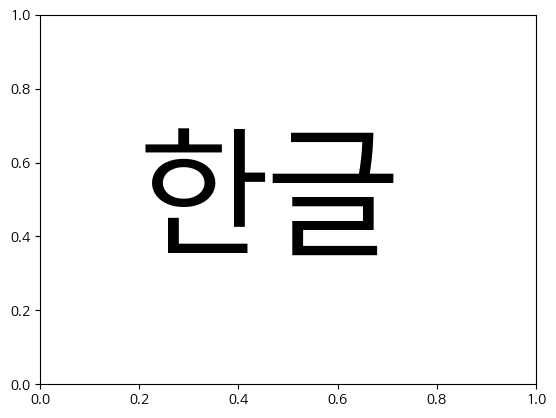

In [18]:
path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname = path).get_name()
rc('font', family = font_name)
plt.text(0.2, 0.4, '한글', size = 100)

In [19]:
file_path = './ref/행정구역시도성연령별취업자20250304.csv'
ori = pd.read_csv(file_path, encoding = 'EUC-KR')
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [26]:
ex_data = ori.copy()
ex_data.columns = ['resion', 'year', 'age', 'gender', 'value']
ex_data.loc[ex_data['resion'] == '세종특별자치시', 'value'] = ex_data.loc[ex_data['resion'] == '세종특별자치시', 'value'].replace('-',0)
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [27]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name = 'total')

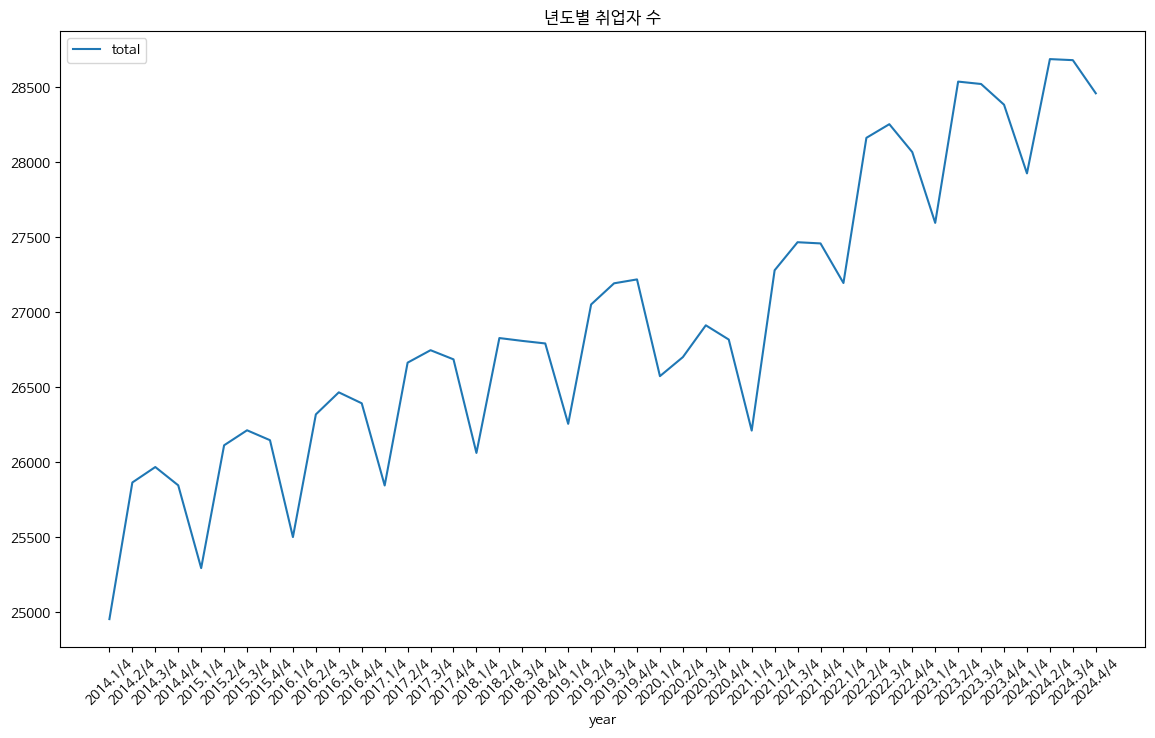

In [30]:
ax = ex1_data.plot(x = 'year', y = 'total', figsize = (14, 8), title = '년도별 취업자 수')
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'], rotation = 45)
plt.show()

In [31]:
ex2_data = ori.copy()
ex2_data.columns = ['resion', 'year', 'age', 'gender', 'value']
ex2_data.loc[ex2_data['resion'] == '세종특별자치시', 'value'] = ex2_data.loc[ex2_data['resion'] == '세종특별자치시', 'value'].replace('-',0)
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [35]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year', 'gender'])['value'].sum().reset_index(name = 'total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [40]:
filter_m = gen['gender'] == '남자'
filter_f = gen['gender'] == '여자'
male = gen[filter_m]
female = gen[filter_f]

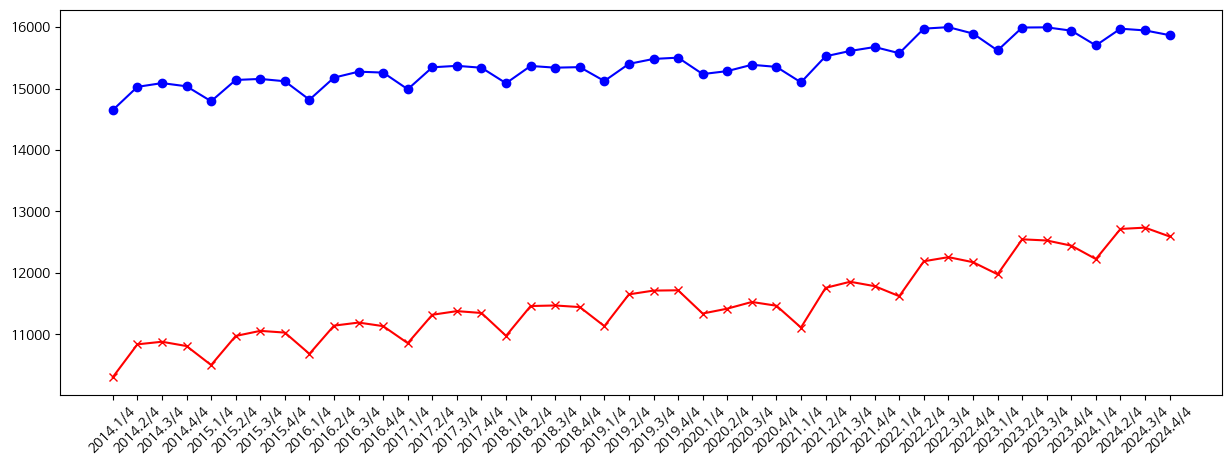

In [47]:
plt.figure(figsize = (15, 5))
plt.plot(male['year'], male['total'], label = '남자', color = 'blue', linestyle = '-', marker = 'o')
plt.plot(female['year'], female['total'], label = '여자', color = 'red', linestyle = '-', marker = 'x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'], rotation = 45)
plt.show()